# wine-reviews (winemag-data_first150k)
## 1. Data Visualization and Data Summary
### 1.1 data summary

In [1]:
import pandas as pd  # data processing, csv file I/O
import numpy as np
import matplotlib.pyplot as plt

# load csv file
data = pd.read_csv('../wine-reviews/winemag-data_first150k.csv')

##### Descriptors of the raw datase

In [2]:
data.info()
data_shape = data.shape
print(data_shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
(150930, 11)


##### Find indexes of nominal and numerical data
remove the redundent column of row number

In [2]:
# Nominal index
nominal_index = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
# Numerical index
numerical_index = ['points', 'price']

# Get frequency of each arrtibute
data_frequency = {key: data[key].value_counts() for key in data.columns}

#### Nominal data summary
- Show top 5 frequency values
- Bar chart visualization of nominal data frequency (Top 50)

Top 5 frequency of country:
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 


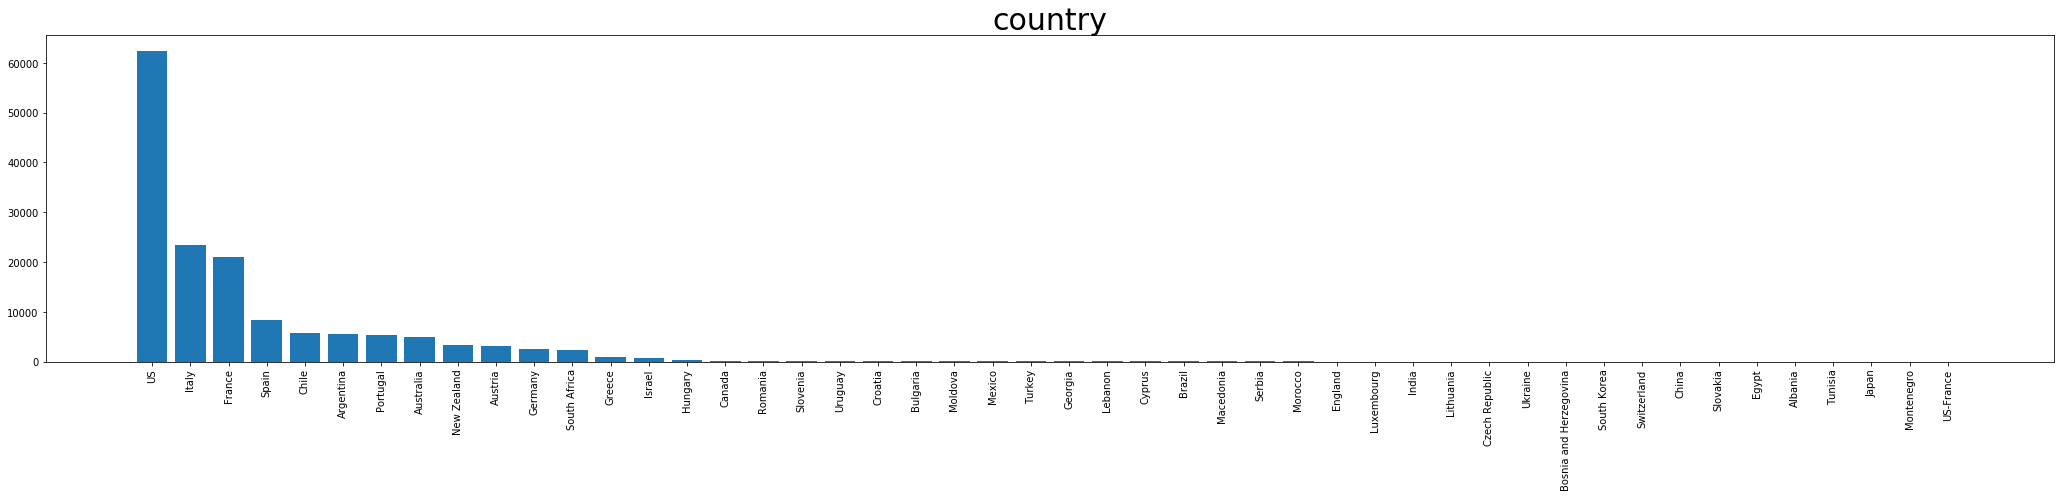

Top 5 frequency of designation:
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 


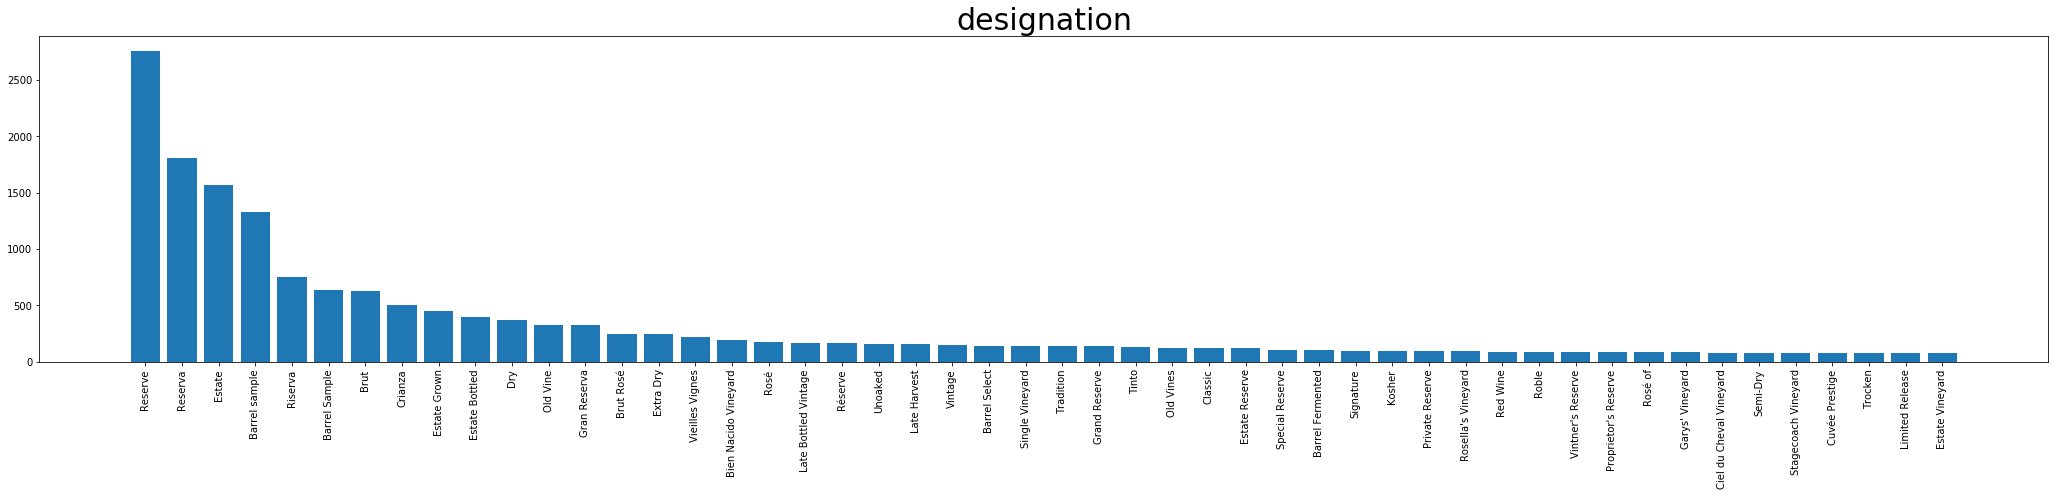

Top 5 frequency of province:
California (61.35%) | Washington (13.44%) | Tuscany (10.04%) | Bordeaux (8.42%) | Northern Spain (6.74%) | 


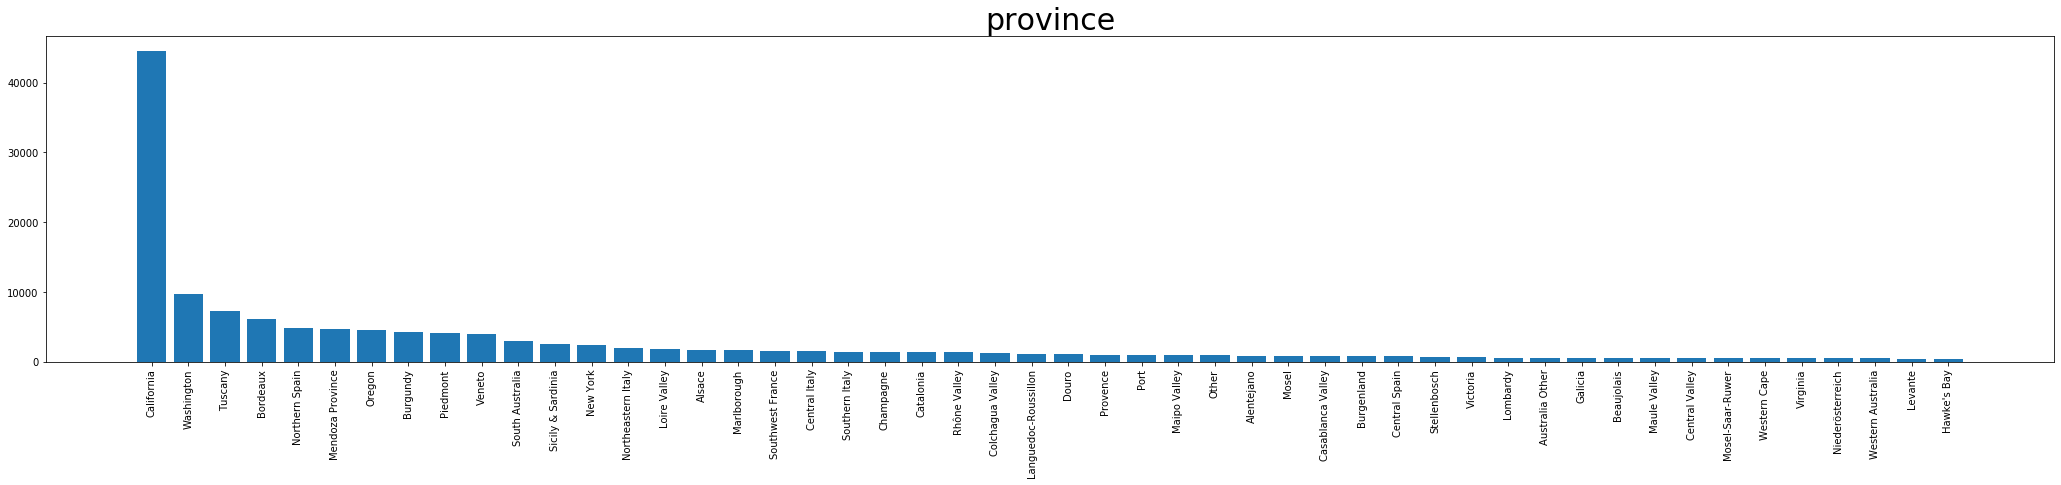

Top 5 frequency of region_1:
Napa Valley (28.48%) | Columbia Valley (WA) (22.82%) | Mendoza (16.45%) | Russian River Valley (16.38%) | California (15.88%) | 


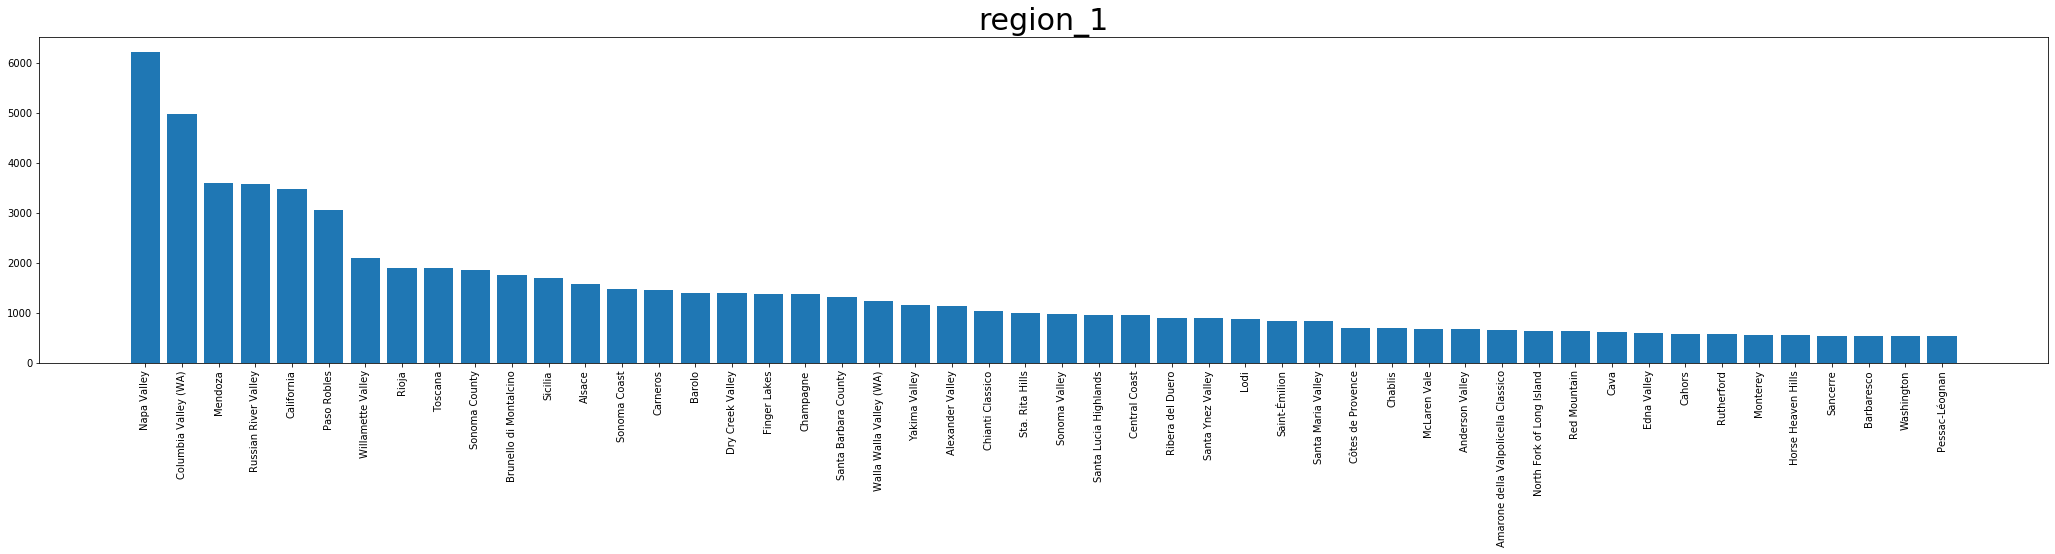

Top 5 frequency of region_2:
Central Coast (28.52%) | Sonoma (24.59%) | Columbia Valley (20.00%) | Napa (19.22%) | California Other (7.68%) | 


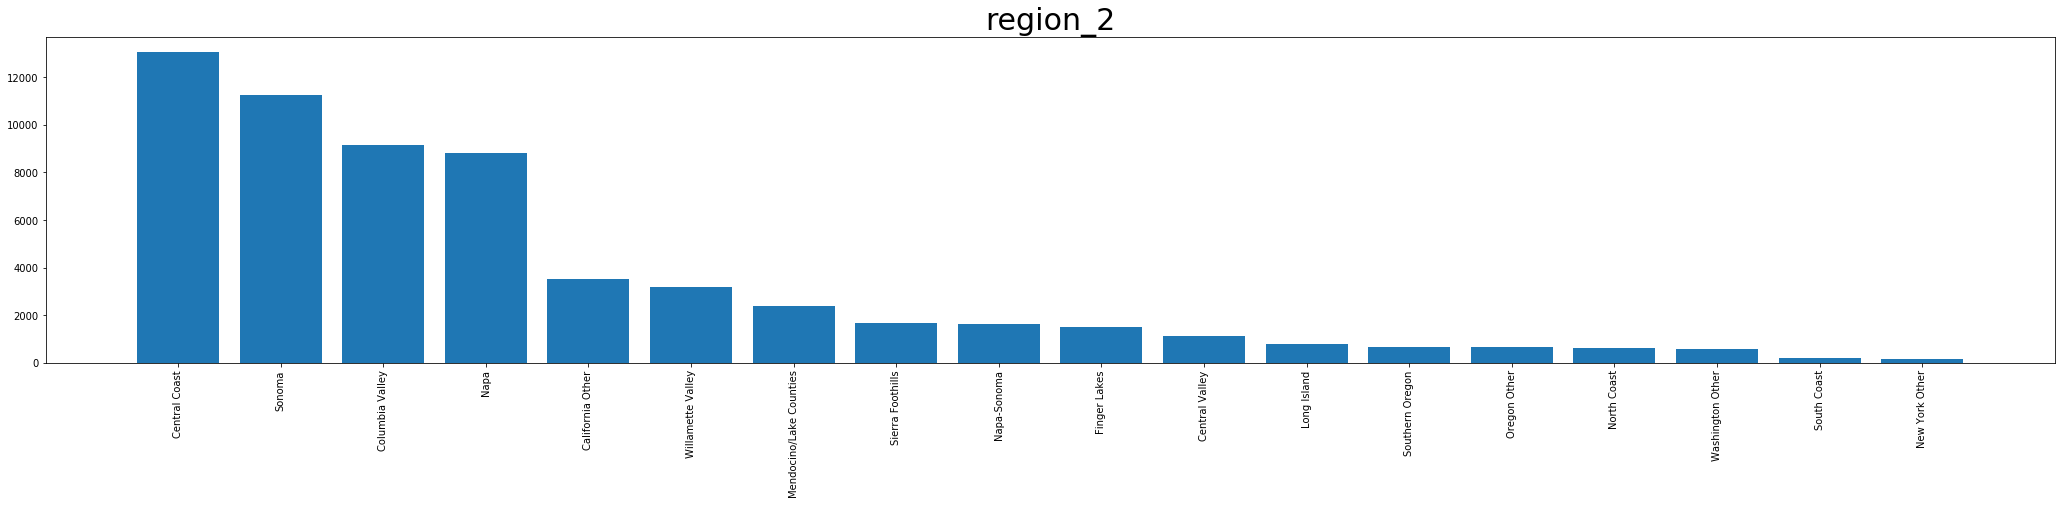

Top 5 frequency of variety:
Chardonnay (24.55%) | Pinot Noir (24.23%) | Cabernet Sauvignon (21.70%) | Red Blend (17.06%) | Bordeaux-style Red Blend (12.46%) | 


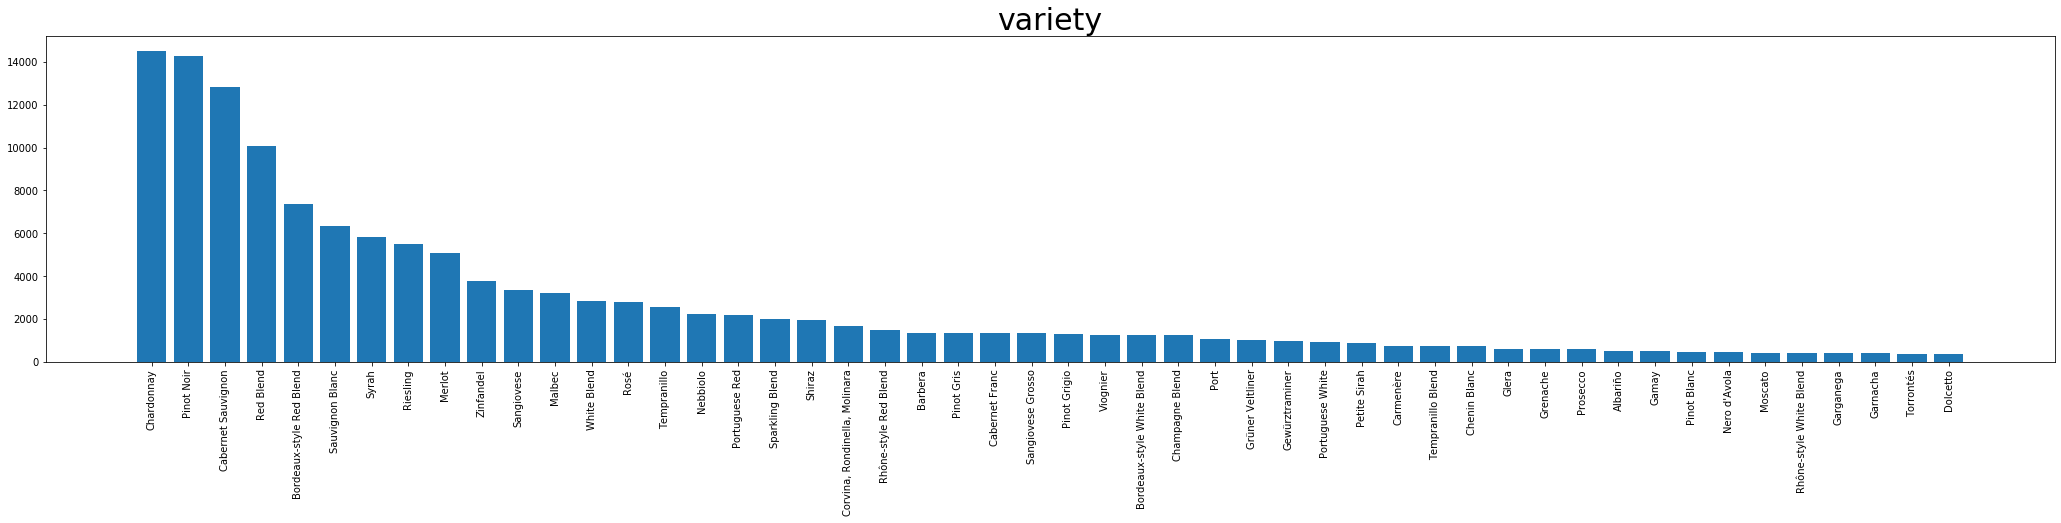

Top 5 frequency of winery:
Williams Selyem (27.74%) | Testarossa (20.33%) | DFJ Vinhos (19.14%) | Chateau Ste. Michelle (16.69%) | Columbia Crest (16.10%) | 


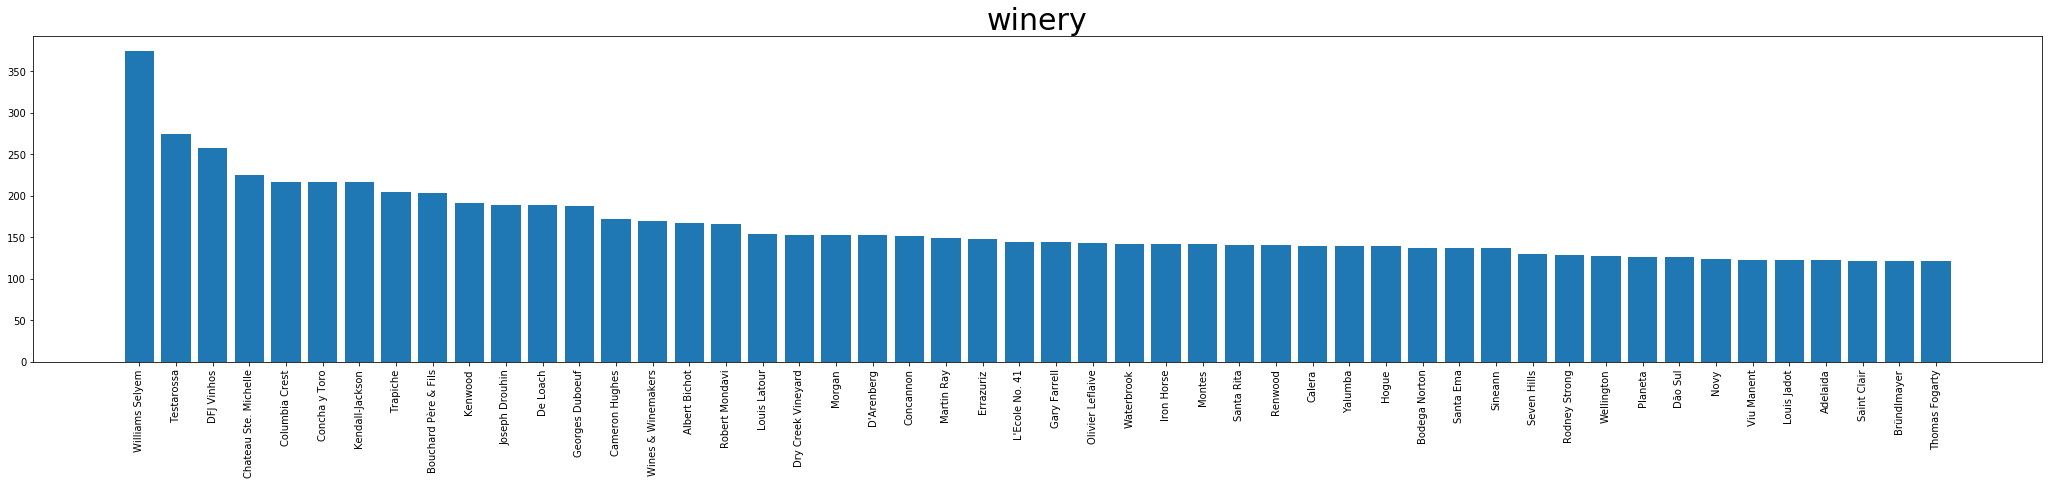

In [4]:
def bar_chart(nominal_data):
    x = nominal_data.index
    y = nominal_data.values
    
    print('Top 5 frequency of %s:'%nominal_data.name)
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print(s)
    
    plt.figure(figsize=(36,6))
    plt.title(nominal_data.name, fontsize=30)    
    plt.bar(x[:50], y[:50])
    plt.xticks(rotation=90)
    plt.show()

# bar chart for each nominal attribute
for i in nominal_index:
    bar_chart(data_frequency[i])

#### Numerical data summary
- Five-number summary:
    - Min 
    - Q1(25%) 
    - Q2(50%)
    - Q3(75%)
    - Max

In [5]:
def data_describe(data):
    """
    Generate descriptive statistics.

    Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
    """
    print('descriptive statistics (%s):' % data.name)
    info = data.describe()
    print('Min: ', info['min'], '\tQ1 (25%): ', info['25%'], '\tQ2 (50%): ', info['50%'], '\tQ3 (75%): ', info['75%'], '\tMax:', info['max'])
    print('Missing: %d'%(data_shape[0] - info['count']))
    print('-'*100)

# five-number summary for each attribute
for i in numerical_index:
    data_describe(data[i])

descriptive statistics (points):
Min:  80.0 	Q1 (25%):  86.0 	Q2 (50%):  88.0 	Q3 (75%):  90.0 	Max: 100.0
Missing: 0
----------------------------------------------------------------------------------------------------
descriptive statistics (price):
Min:  4.0 	Q1 (25%):  16.0 	Q2 (50%):  24.0 	Q3 (75%):  40.0 	Max: 2300.0
Missing: 13695
----------------------------------------------------------------------------------------------------


### 1.2 Data Visualization
#### Numerical data visualization
- histogram  
- box plot
- scatter matrix

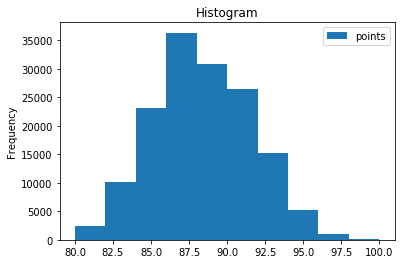

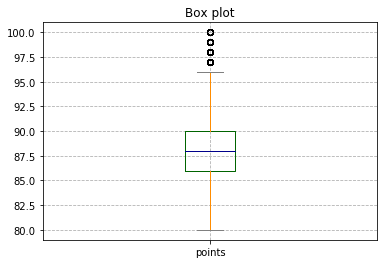

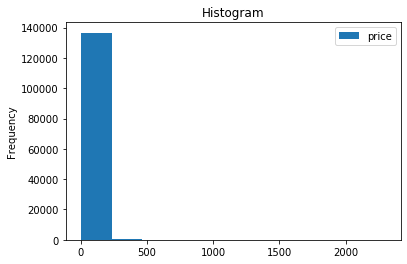

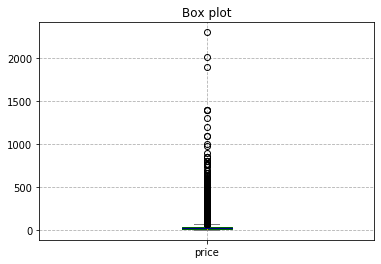

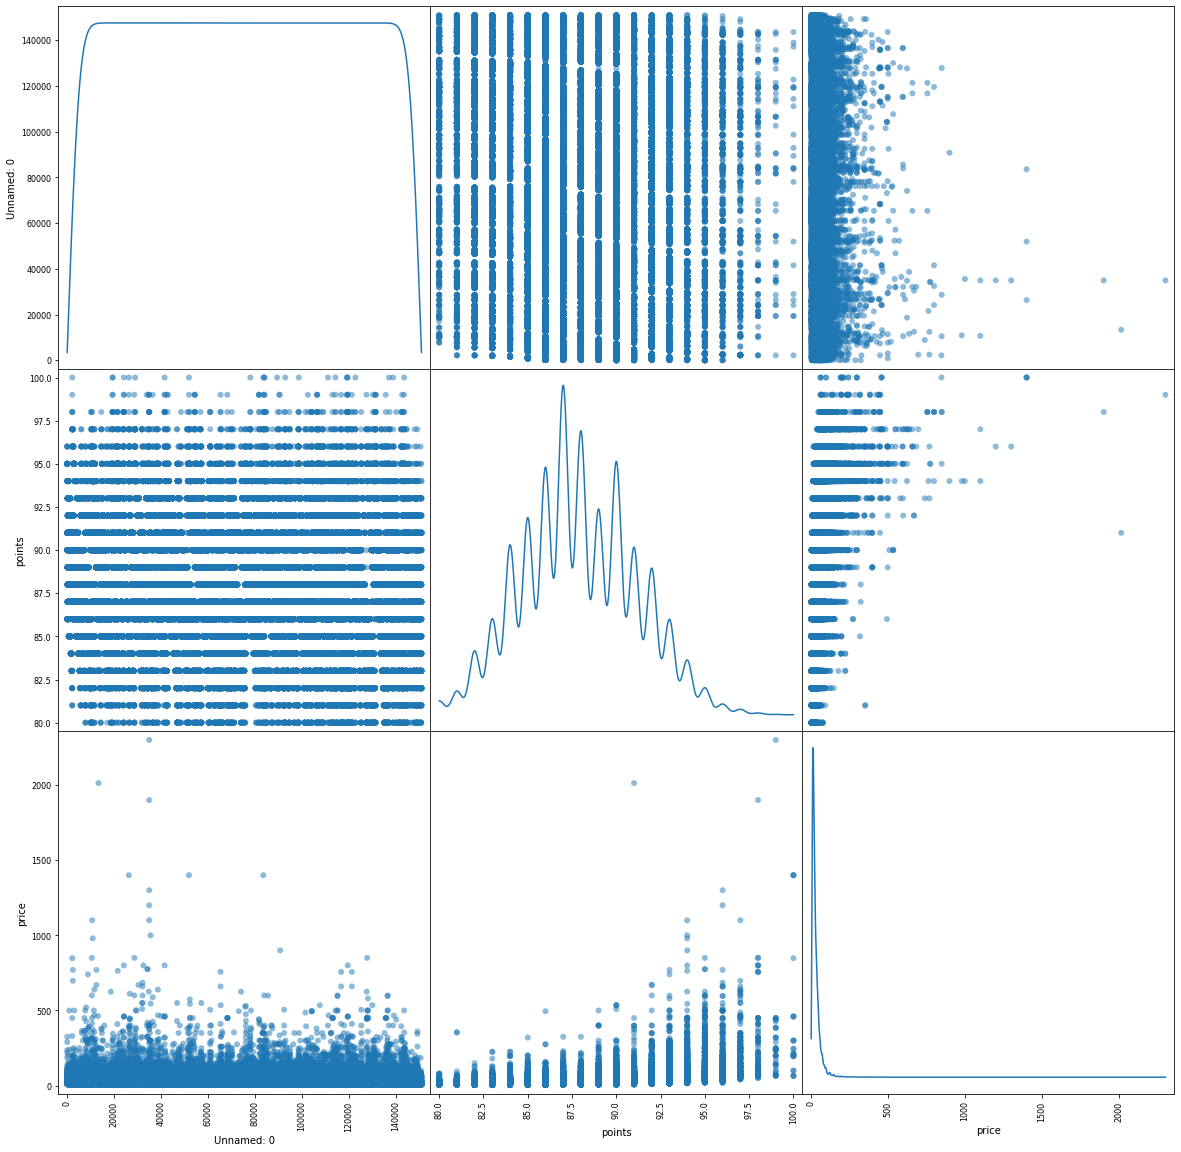

In [6]:
# histogram
def histogram(data):
    df = pd.DataFrame(data)
    df.plot.hist()
    plt.title('Histogram')
    plt.show()

# box plot
def box_plot(data):
    # boxes 箱线
    # whiskers 分为数于error bar横线之间的竖线的颜色
    # medians 中位线的颜色
    # caps error bar 横线的颜色
    color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
    data.plot.box(grid=True, color=color)   # color 样式填充
    plt.grid(linestyle='--')
    plt.title('Box plot')
    plt.show()

def box_plot1(data):
    df = pd.DataFrame(data)
    df.boxplot(sym = 'o',    #异常点形状
                   vert = True,          # 是否垂直
                   whis=1.5,             # IQR
                   patch_artist = True,  # 上下四分位框是否填充
                   meanline = False,showmeans = True,  # 是否有均值线及其形状
                   showbox = True,   # 是否显示箱线
                   showfliers = True,  #是否显示异常值
                   notch = False,    # 中间箱体是否缺口
                   return_type='dict')  # 返回类型为字典
    plt.grid(linestyle='--')
    plt.title('Box plot')
    plt.show()

# scatter plot
def scatter_plot(data1, index1, index2):
    data.plot.scatter(x=index1,
                   y=index2,
                   c='DarkBlue')
    plt.title('Scatter plot')
    plt.show()

for i in numerical_index:
    histogram(data[i])
    box_plot(data[i])

# scatter matrix
# The diagonal of the matrix is the KDE(Kernel Density Estimation) of each feature, and the color is the variety of wine
pd.plotting.scatter_matrix(data, marker='o', figsize=(20, 20), diagonal='kde')
plt.show()

## 2. Processing of missing data

### 2.1 Remove missing values

In [6]:
# Remove missing values
data_remove = data.dropna()
data_remove.info()

# Get frequency of each arrtibute (after remove missing values)
data_remove_frequency = {key: data_remove[key].value_counts() for key in data_remove.columns}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39241 entries, 0 to 150916
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   39241 non-null  int64  
 1   country      39241 non-null  object 
 2   description  39241 non-null  object 
 3   designation  39241 non-null  object 
 4   points       39241 non-null  int64  
 5   price        39241 non-null  float64
 6   province     39241 non-null  object 
 7   region_1     39241 non-null  object 
 8   region_2     39241 non-null  object 
 9   variety      39241 non-null  object 
 10  winery       39241 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.6+ MB


#### compare with raw data
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [3]:
def compare_top5_frequency(nominal_data, nominal_data1):
    x = nominal_data.index
    y = nominal_data.values
    
    print('Top 5 frequency of %s (raw data):' % nominal_data.name)
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print(s)
    
    x = nominal_data1.index
    y = nominal_data1.values
    print('\033[95mTop 5 frequency of %s (after remove missing values):' % nominal_data1.name + '\033[0m')
    top5_x = x[:5]
    top5_y = y[:5]
    top5_sum = np.sum(top5_y)
    s = ''
    for i in range(len(top5_x)):
        s += str(top5_x[i]) + ' ({:.2%})'.format(top5_y[i] / top5_sum) + ' | '
    print('\033[95m' + s + '\033[0m')
    print('-'*100)

In [4]:
# Compared Histogram
def histogram_compare(raw_data, new_data):
    new_name = ['new_' + new_data.name]
    raw_data = pd.DataFrame(raw_data)
    new_data = pd.DataFrame(new_data)
    new_data.columns=new_name
    df = raw_data.append(new_data)
    df.plot.hist(stacked=True)
    plt.title('Compared Histogram')
    plt.show()

# Compared Box plot
def box_plot_compare(raw_data, new_data):
    # boxes 箱线
    # whiskers 分为数于error bar横线之间的竖线的颜色
    # medians 中位线的颜色
    # caps error bar 横线的颜色
    new_name = ['new_' + new_data.name]
    raw_data = pd.DataFrame(raw_data)
    new_data = pd.DataFrame(new_data)
    new_data.columns=new_name
    df = raw_data.append(new_data)
    color = dict(boxes  = 'DarkGreen',whiskers = 'DarkOrange',medians = 'DarkBlue',caps ='Gray')
    df.plot.box(grid=True, color=color)   # color 样式填充
    plt.grid(linestyle='--')
    plt.title('Compared Box plot')
    plt.show()

# Compared Scatter plot
def scatter_plot_compare(data1, data2, index1, index2):
    ax = data.plot.scatter(x=index1, y=index2, c='DarkBlue', label='Raw data')
    data_remove.plot.scatter(x=index1, y=index2, c='r', label='New data', ax=ax)
    plt.title('Compared Scatter plot')
    plt.show()

In [7]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], data_remove_frequency[i])

Top 5 frequency of country (raw data):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
Top 5 frequency of country (after remove missing values):
US (100.00%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (44.77%) | Estate (33.28%) | Estate Grown (9.59%) | Old Vine (6.20%) | Dry (6.15%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (61.35%) | Washington (13.44%) | Tuscany (10.04%) | Bordeaux (8.42%) | Northern Spain (6.74%) | 
Top 5 frequency of province (after remove missing values):
California (72.77%) | Washington (15.60%) | Oregon (7.74%) | New York (3.89%) | 
----------------

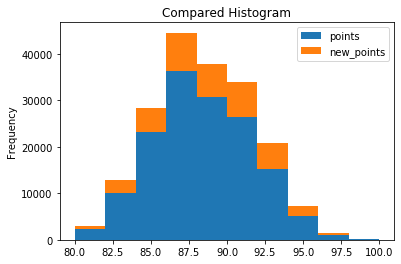

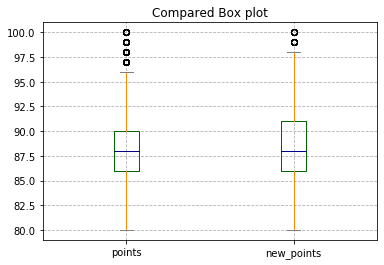

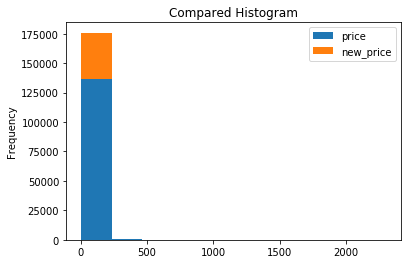

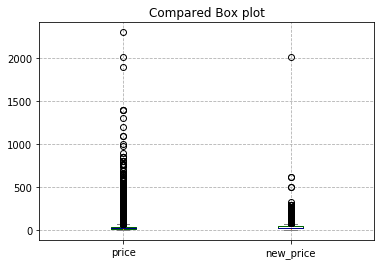

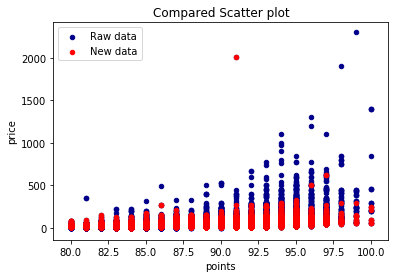

In [8]:
for i in numerical_index:
    histogram_compare(data[i], data_remove[i])
    box_plot_compare(data[i], data_remove[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, data_remove, 'points', 'price')

###  2.2 Fill NA/NaN values using the highest frequency value

In [10]:
# Fill NA/NaN values using the highest frequency value.
highest_frequency_values = {key: data[key].value_counts().index[0] for key in data.columns}
data_highest = data.fillna(value=highest_frequency_values)
data_highest.info()

# Get frequency of each arrtibute (after fill NaN vaues using the higest frequency value)
data_highest_frequency = {key: data_highest[key].value_counts() for key in data_highest.columns}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  150930 non-null  object 
 4   points       150930 non-null  int64  
 5   price        150930 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     150930 non-null  object 
 8   region_2     150930 non-null  object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


#### compare with raw data
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [11]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], data_highest_frequency[i])

Top 5 frequency of country (raw data):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
Top 5 frequency of country (after remove missing values):
US (51.55%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (89.88%) | Reserva (3.36%) | Estate (2.91%) | Barrel sample (2.46%) | Riserva (1.40%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (61.35%) | Washington (13.44%) | Tuscany (10.04%) | Bordeaux (8.42%) | Northern Spain (6.74%) | 
Top 5 frequency of province (after remove missing values):
California (61.36%) | Washin

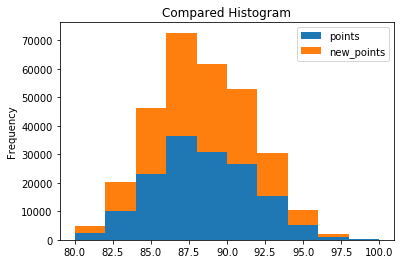

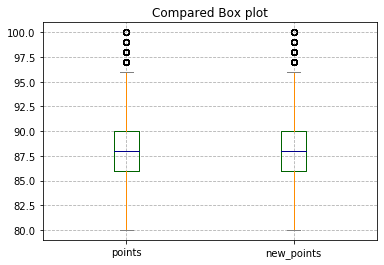

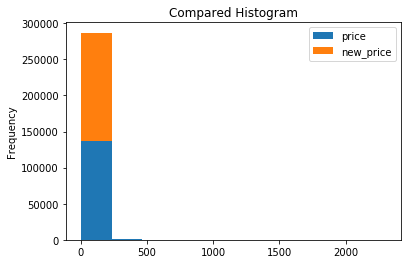

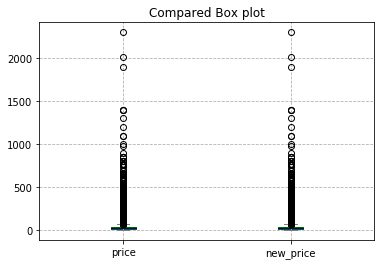

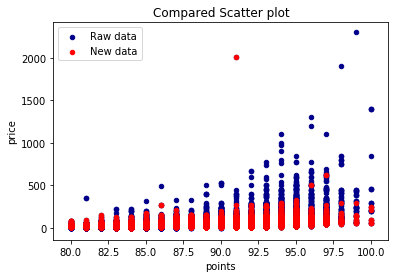

In [12]:
for i in numerical_index:
    histogram_compare(data[i], data_highest[i])
    box_plot_compare(data[i], data_highest[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, data_highest, 'points', 'price')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


###  2.3 Fill in missing values by the correlation of the attribute
#### Random Forest Regressor
Missing attributes: country (5) | province (5) | region_1 (25060) | region_2 (89977) | price(13695) | designation (45735) | 

In [9]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
def set_missing_values(df, complete_index):
    
    enc_label = OrdinalEncoder()
    enc_fea = OrdinalEncoder()
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
    # y is the know missing_index
    y = known_values[:, 0].reshape(-1, 1)
    enc_label.fit(y)
#     print(enc_label.categories_)
    y = enc_label.transform(y)
    
    # X are the features
    X = known_values[:, 1:]
    test_X = unknow_values[:, 1:]
    all_X = np.row_stack((X,test_X))
#     print(X.shape, test_X.shape, all_X.shape)
    enc_fea.fit(all_X)
#     print(enc_fea.categories_)
    X = enc_fea.transform(X)
    
    # fit
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y.ravel())
    # predict
    predicted_values = rfr.predict(enc_fea.transform(unknow_values[:, 1:]))
    predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
    print('fill in values of %s:'%missing_index, predicted_values)
     # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values

First, fill in missing values of '**country**' using complete attribute data ('description' & 'variety' & 'winery')

In [10]:
new_data1 = data.copy()
set_missing_values(new_data1, ['country','description', 'variety', 'winery'])
new_data1.info()

fill in values of country: [['Germany']
 ['Slovenia']
 ['Chile']
 ['Chile']
 ['Chile']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Second, fill in missing values of '**province**' using complete attribute data ('country' & 'description' & 'variety' & 'winery')

In [16]:
new_data2 = new_data1.copy()
set_missing_values(new_data2, ['province','country','description', 'variety', 'winery'])
new_data2.info()

fill in values of province: [['Moutere']
 ['Overberg']
 ['Krania Olympus']
 ['Krania Olympus']
 ['Krania Olympus']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Third, fill in missing values of '**region_1**' using complete attribute data ('province' & 'country' & 'description' & 'variety' & 'winery')

In [17]:
new_data3 = new_data2.copy()
set_missing_values(new_data3, ['region_1', 'province','country','description', 'variety', 'winery'])
new_data3.info()

fill in values of region_1: [['Rattlesnake Hills']
 ['Old Mission Peninsula']
 ['Monreale']
 ...
 ['Lake County']
 ['Martina']
 ['Offida Rosso']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     150930 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Forth, fill in missing values of '**region_2**' using complete attribute data ('region_1' & 'province' & 'country' & 'description' & 'variety' & 'winery')

In [18]:
new_data4 = new_data3.copy()
set_missing_values(new_data4, ['region_2', 'region_1', 'province','country','description', 'variety', 'winery'])
new_data4.info()

fill in values of region_2: [['Finger Lakes']
 ['Central Coast']
 ['Long Island']
 ...
 ['Washington Other']
 ['Central Coast']
 ['Central Valley']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     150930 non-null  object 
 8   region_2     150930 non-null  object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Fivth, fill in missing values of '**price**' using complete attribute data ('region_2' & 'region_1' & 'province' & 'country' & 'description' & 'variety' & 'winery')

In [19]:
new_data5 = new_data4.copy()
set_missing_values(new_data5, ['price', 'region_2', 'region_1', 'province','country','description', 'variety', 'winery'])
new_data5.info()

fill in values of price: [[65.0]
 [37.0]
 [60.0]
 ...
 [22.0]
 [26.0]
 [23.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        150930 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     150930 non-null  object 
 8   region_2     150930 non-null  object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


Finally, fill in missing values of '**designation**' using complete attribute data ('price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'variety' & 'winery')

In [20]:
new_data = new_data5.copy()
set_missing_values(new_data, ['designation', 'price', 'region_2', 'region_1', 'province','country','description', 'variety', 'winery'])
new_data.info()
# Get frequency of each arrtibute (after fill in missing values by the correlation of the attribute)
new_data_frequency = {key: new_data[key].value_counts() for key in new_data.columns}

fill in values of designation: [['Hooker Old Boys']
 ['Munjebel 7 VA']
 ["Mountainview Ranch Winemaker's Reserve"]
 ...
 ['Grand Muscadelle']
 ['Gran Assemblage']
 ['Jeriko Vineyard']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  150930 non-null  object 
 4   points       150930 non-null  int64  
 5   price        150930 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     150930 non-null  object 
 8   region_2     150930 non-null  object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


#### compare with raw data
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [21]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], new_data_frequency[i])

Top 5 frequency of country (raw data):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
Top 5 frequency of country (after remove missing values):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.81%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (61.35%) | Washington (13.44%) | Tuscany (10.04%) | Bordeaux (8.42%) | Northern Spain (6.74%) | 
Top 5 frequency of province (after remove missing values):
California (61.35%) | Was

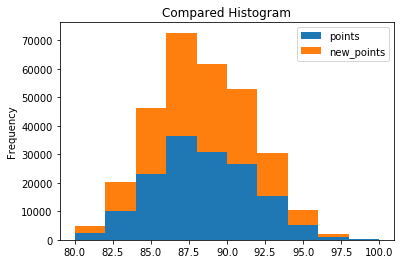

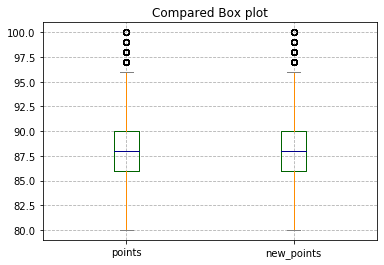

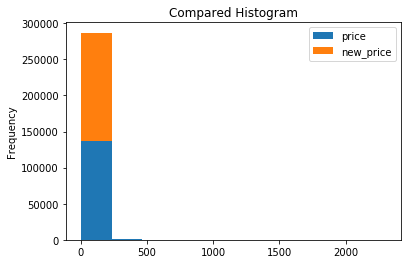

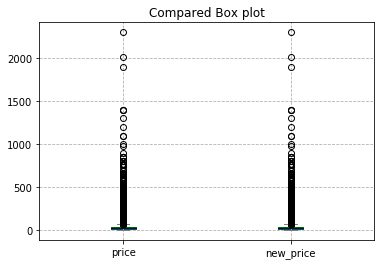

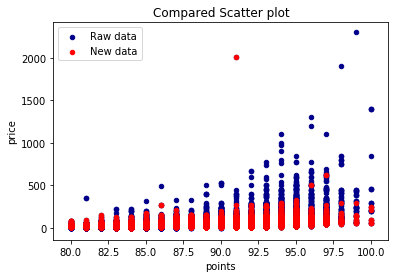

In [22]:
for i in numerical_index:
    histogram_compare(data[i], data_highest[i])
    box_plot_compare(data[i], data_highest[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, data_highest, 'points', 'price')

### 2.4 Fill in missing values by similarity between data objects
#### Cosine similarity & Euclidean distance
Missing attributes: country (5) | province (5) | region_1 (25,060) | region_2 (89,977) | price(13,695) | designation (45,735) | 


Due to insufficient memory, I did fill in missing values of '**country**', '**province**', '**price**'

In [11]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist
def set_missing_values_cosine(df, complete_index, metric='cosine'):
    
    enc_label = OrdinalEncoder()
    enc_fea = OrdinalEncoder()
    
    missing_index = complete_index[0]
    
    # Take out the existing numerical data (no NaN) and throw them in Random Forest Regressor
    train_df = df[complete_index]
    # known & unknow values
    known_values = np.array(train_df[train_df[missing_index].notnull()])
    unknow_values = np.array(train_df[train_df[missing_index].isnull()])
    
    # y is the know missing_index
    y = known_values[:, 0].reshape(-1, 1)
    enc_label.fit(y)
    y = enc_label.transform(y)
    
    # X are the features
    X = known_values[:, 1:]
    
    test_X = unknow_values[:, 1:]
    all_X = np.row_stack((X,test_X))
    enc_fea.fit(all_X)
    X = enc_fea.transform(X)
    test_X = enc_fea.transform(test_X)
    
    
    if metric == 'cosine':
        # fit
        dist = cosine_similarity(test_X, X)
        # predict
        most_similar_index = dist.argmax(axis=1)
    elif metric == 'euclidean':
         # fit
        dist = cdist(test_X,X,metric='euclidean')
        # predict
        most_similar_index = dist.argmin(axis=1)
    
    predicted_values = y[most_similar_index]
    predicted_values = enc_label.inverse_transform(predicted_values.reshape(-1, 1))
    print('fill in values of %s:'%missing_index, predicted_values)
     # fill in with predicted values
    df.loc[ (df[missing_index].isnull()), missing_index] = predicted_values 

First, fill in missing values of '**country**' using complete attribute data ('description' & 'variety' & 'winery')

In [22]:
# cosine similarity
cos_data1 = data.copy()
set_missing_values_cosine(cos_data1, ['country','description', 'variety', 'winery'], 'cosine')
cos_data1.info()

# euclidean distance
euclidean_data1 = data.copy()
set_missing_values_cosine(euclidean_data1, ['country','description', 'variety', 'winery'], 'euclidean')
euclidean_data1.info()

fill in values of country: [['Austria']
 ['Italy']
 ['Portugal']
 ['Portugal']
 ['Portugal']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
fill in values of country: [['Austria']
 ['Serbia']
 ['Italy']
 ['Italy']
 ['Italy']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data colu

Second, fill in missing values of '**province**' using complete attribute data ('country' & 'description' & 'variety' & 'winery')

In [13]:
# cosine similarity
cos_data2 = cos_data1.copy()
set_missing_values_cosine(cos_data2, ['province','country','description', 'variety', 'winery'], 'cosine')
cos_data2.info()

# euclidean distance
euclidean_data2 = euclidean_data1.copy()
set_missing_values_cosine(euclidean_data2, ['province','country','description', 'variety', 'winery'], 'euclidean')
euclidean_data2.info()

fill in values of province: [['Vienna']
 ['Sicily & Sardinia']
 ['Port']
 ['Port']
 ['Port']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
fill in values of province: [['Eisenberg']
 ['Župa']
 ['Piedmont']
 ['Piedmont']
 ['Piedmont']]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929

# <u>Delete, dut to insufficient memory</u>
Third, fill in missing values of '**region_1**' using complete attribute data ('province' & 'country' & 'description' & 'variety' & 'winery')

In [ ]:
# cosine similarity
cos_data3 = cos_data2.copy()
set_missing_values_cosine(cos_data3, ['region_1', 'province','country','description', 'variety', 'winery'], 'cosine')
cos_data3.info()

# euclidean distance
euclidean_data3 = euclidean_data2.copy()
set_missing_values_cosine(euclidean_data3, ['region_1', 'province','country','description', 'variety', 'winery'], 'euclidean')
euclidean_data3.info()

# <u>Delete, dut to insufficient memory</u>
Forth, fill in missing values of '**region_2**' using complete attribute data ('region_1' & 'province' & 'country' & 'description' & 'variety' & 'winery')

In [ ]:
# cosine similarity
cos_data4 = cos_data3.copy()
set_missing_values_cosine(cos_data4, ['region_2', 'region_1', 'province','country','description', 'variety', 'winery'], 'cosine')
cos_data4.info()

# euclidean distance
euclidean_data4 = euclidean_data3.copy()
set_missing_values_cosine(euclidean_data4, ['region_2', 'region_1', 'province','country','description', 'variety', 'winery'], 'euclidean')
euclidean_data4.info()

Fivth, fill in missing values of '**price**' using complete attribute data ('province' & 'country' & 'description' & 'variety' & 'winery')

In [15]:
# cosine similarity
cos_data5 = cos_data2.copy()
set_missing_values_cosine(cos_data5, ['price', 'province','country','description', 'variety', 'winery'], 'cosine')
cos_data5.info()

# euclidean distance
euclidean_data5 = euclidean_data2.copy()
set_missing_values_cosine(euclidean_data5, ['price', 'province','country','description', 'variety', 'winery'], 'euclidean')
euclidean_data5.info()

fill in values of price: [[11.0]
 [26.0]
 [70.0]
 ...
 [21.0]
 [45.0]
 [12.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        150930 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
fill in values of price: [[105.0]
 [24.0]
 [29.0]
 ...
 [10.0]
 [20.0]
 [30.0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns

# <u>Delete, dut to insufficient memory</u>
Finally, fill in missing values of '**designation**' using complete attribute data ('price' & region_2' & 'region_1' & 'province' & 'country' & 'description' & 'variety' & 'winery')

In [ ]:
# cosine similarity
cos_data = cos_data5.copy()
set_missing_values_cosine(cos_data, ['designation', 'price', 'region_2', 'region_1', 'province','country','description', 'variety', 'winery'], 'cosine')
cos_data.info()

# euclidean distance
euclidean_data = euclidean_data5.copy()
set_missing_values_cosine(euclidean_data, ['designation', 'price', 'region_2', 'region_1', 'province','country','description', 'variety', 'winery'], 'euclidean')
euclidean_data.info()

# Get frequency of each arrtibute (after fill in missing values by the cosine similarity of the object)
cos_data_frequency = {key: cos_data[key].value_counts() for key in cos_data.columns}

# Get frequency of each arrtibute (after fill in missing values by the uclidean distance of the object)
euclidean_data_frequency = {key: euclidean_data[key].value_counts() for key in euclidean_data.columns}

## Final filling data

In [16]:
cos_data = cos_data5.copy()
cos_data.info()
# Get frequency of each arrtibute (after fill in missing values by the correlation of the attribute)
cos_data_frequency = {key: cos_data[key].value_counts() for key in cos_data.columns}

euclidean_data = euclidean_data5.copy()
euclidean_data.info()
# Get frequency of each arrtibute (after fill in missing values by the correlation of the attribute)
euclidean_data_frequency = {key: euclidean_data[key].value_counts() for key in euclidean_data.columns}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        150930 non-null  float64
 6   province     150930 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150930 no

#### compare with raw data (Cosine similarity)
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [17]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], cos_data_frequency[i])

Top 5 frequency of country (raw data):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
Top 5 frequency of country (after remove missing values):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (61.35%) | Washington (13.44%) | Tuscany (10.04%) | Bordeaux (8.42%) | Northern Spain (6.74%) | 
Top 5 frequency of province (after remove missing values):
California (61.35%) | Was

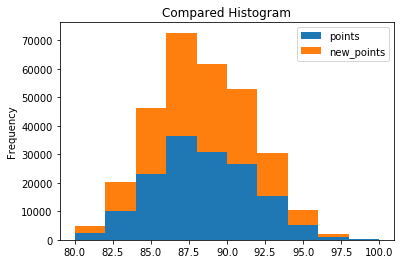

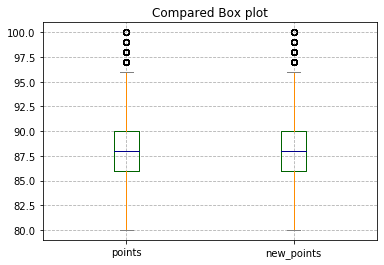

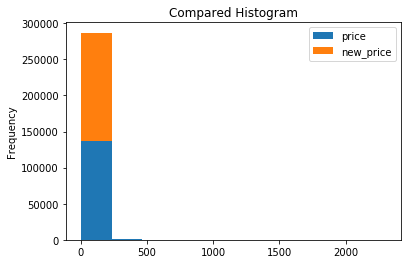

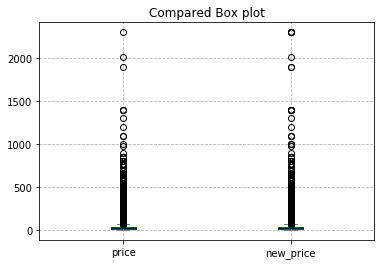

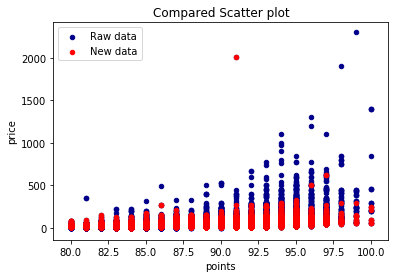

In [18]:
for i in numerical_index:
    histogram_compare(data[i], cos_data[i])
    box_plot_compare(data[i], cos_data[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, cos_data, 'points', 'price')

#### compare with raw data (Euclidean distance)
- compare top 5 frequency of nominal_data
- Compared Histogram
- Compared box plot
- Compared scatter plot

In [19]:
# compare top 5 frequency of nominal_data
for i in nominal_index:
    compare_top5_frequency(data_frequency[i], euclidean_data_frequency[i])

Top 5 frequency of country (raw data):
US (51.54%) | Italy (19.39%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
Top 5 frequency of country (after remove missing values):
US (51.54%) | Italy (19.40%) | France (17.43%) | Spain (6.83%) | Chile (4.80%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of designation (raw data):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
Top 5 frequency of designation (after remove missing values):
Reserve (33.51%) | Reserva (22.04%) | Estate (19.13%) | Barrel sample (16.15%) | Riserva (9.18%) | 
----------------------------------------------------------------------------------------------------
Top 5 frequency of province (raw data):
California (61.35%) | Washington (13.44%) | Tuscany (10.04%) | Bordeaux (8.42%) | Northern Spain (6.74%) | 
Top 5 frequency of province (after remove missing values):
California (61.35%) | Was

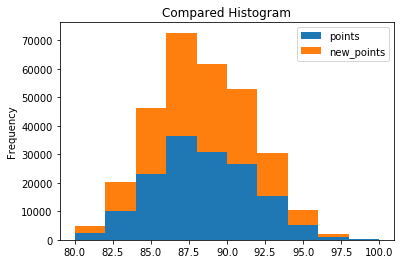

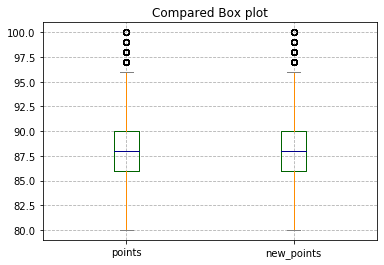

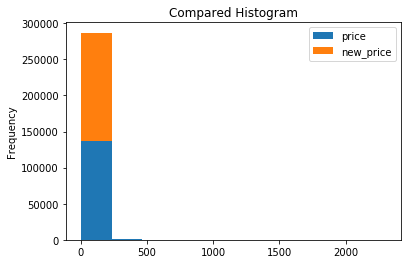

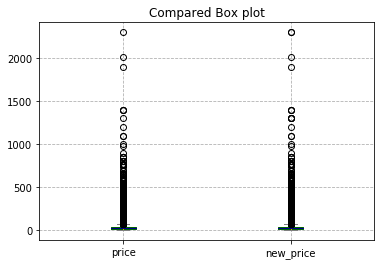

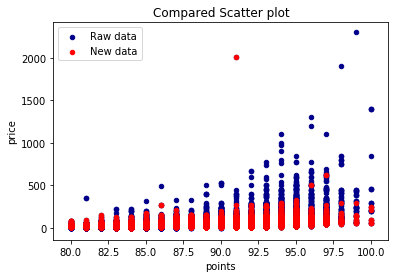

In [20]:
for i in numerical_index:
    histogram_compare(data[i], euclidean_data[i])
    box_plot_compare(data[i], euclidean_data[i])

# Compare between raw and new data using 'points' & 'price' scatter plot
scatter_plot_compare(data, euclidean_data, 'points', 'price')